## Load necessary packages

In [2]:
import pandas as pd
import seaborn as sns
import Bio.SeqIO as SeqIO
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Sequence Filtering

In [3]:
# load the data
dt = pd.read_csv('LTRs.csv')
dt.head()
dt["Sequence"] = dt['Sequence'].astype(str)

[Text(0, 0, 'Calamus_simplicifolius.WGS.fasta'),
 Text(1, 0, 'Cephalotus_follicularis_genome_v1.0.fa'),
 Text(2, 0, 'Daemonorops_jenkinsiana.genome.WGS.fa'),
 Text(3, 0, 'Cocos_nucifera.fa'),
 Text(4, 0, 'Gnetum_montanum.1_0.fa'),
 Text(5, 0, 'Ammopiptanthus_nanus.fa'),
 Text(6, 0, 'Taraxacum_kok-saghyz.genome.fasta'),
 Text(7, 0, 'Vaccinium_corymbosum_genome_v1.0.fasta'),
 Text(8, 0, 'Catharanthus_roseus_v2.fa'),
 Text(9, 0, 'Spinacia_oleracea_Sp75_genome_v1.fa'),
 Text(10, 0, 'Dimocarpus_longan.scaffold.fa'),
 Text(11, 0, 'Juglans_regia.1_4.fa'),
 Text(12, 0, 'Fagus_sylvatica_genome.fa'),
 Text(13, 0, 'Siraitia_grosvenorii.fa'),
 Text(14, 0, 'Fagopyrum_tataricum_V2.fa'),
 Text(15, 0, 'Beta_vulgaris_v1.2.fa'),
 Text(16, 0, 'Faidherbia_albida_genome.fa'),
 Text(17, 0, 'Brassica_oleracea.v2.1.dna.toplevel.fa'),
 Text(18, 0, 'Cercis_canadensis_v1.0.fa'),
 Text(19, 0, 'Fagopyrum_esculentum_r1.0.fa'),
 Text(20, 0, 'Betula_pendula.fa'),
 Text(21, 0, 'Ostrya_rehderiana.genome.fa'),
 Text(22,

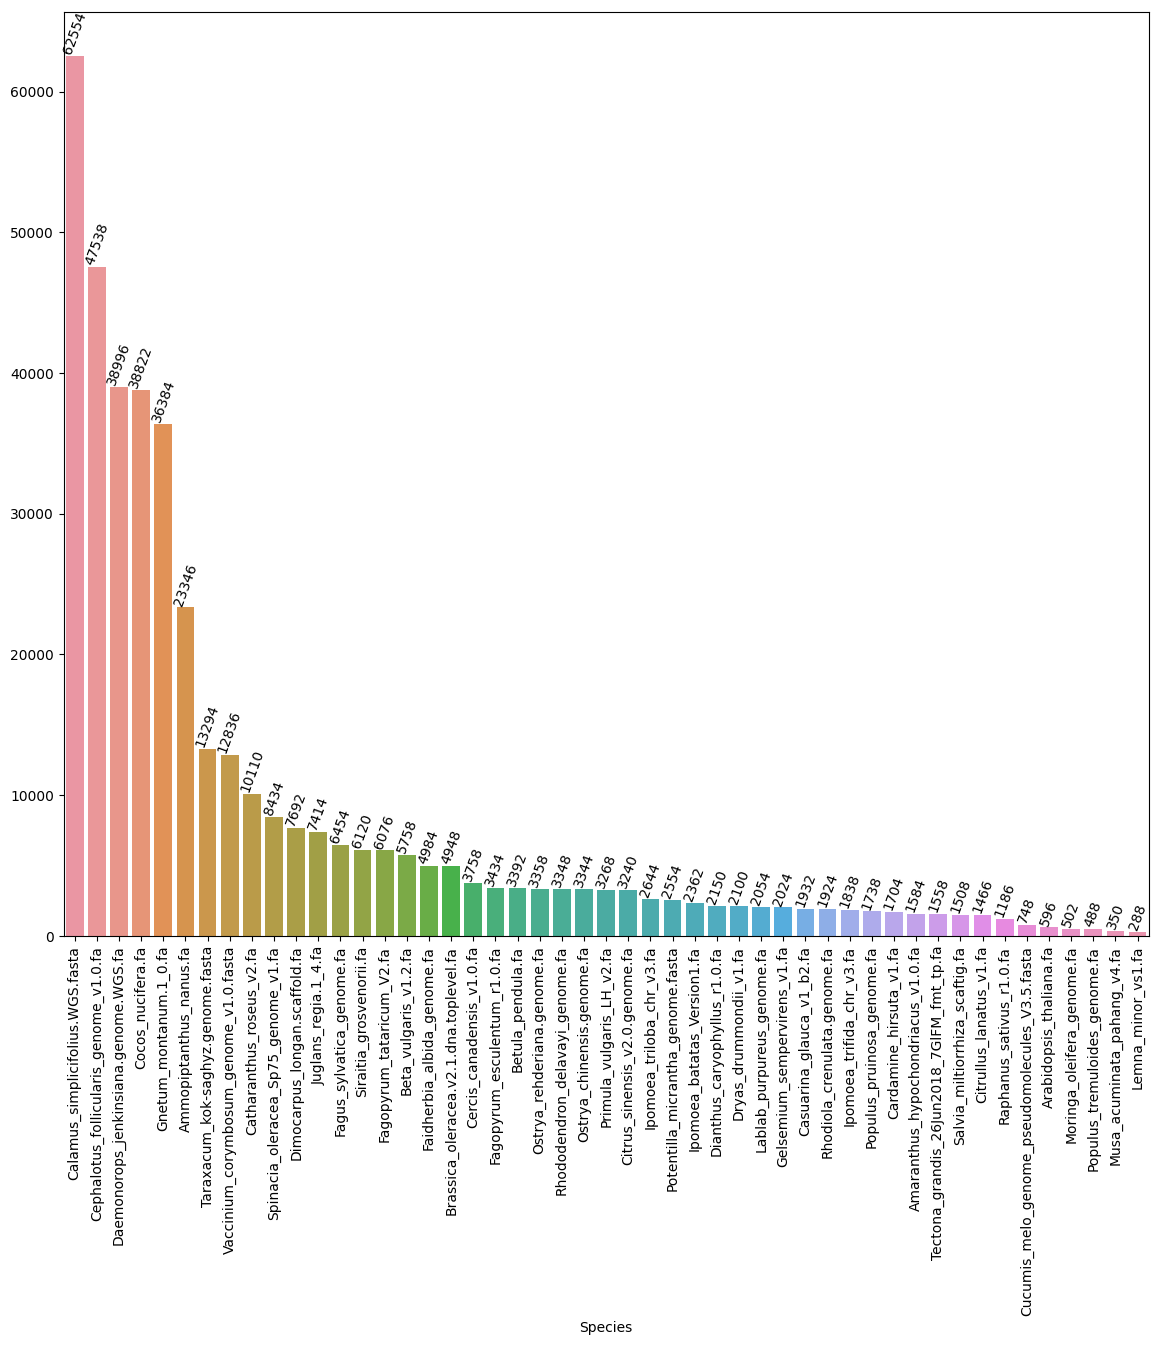

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_size_inches(14,12)
g = sns.barplot(y =dt["Species"].value_counts().values, x = dt["Species"].value_counts().index, ax = ax)
ax.bar_label(ax.containers[-1], label_type='edge', rotation=70)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [4]:
# Remove 0 length sequences
dt["SeqLen"] = dt.loc[:, ("Sequence")].apply(lambda x: len(x))
dt = dt[dt["SeqLen"] > 10]

# Remove sequences with identity < 80%
dt = dt[dt['LTR_identity'] >= 0.80]

In [4]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
# To start off, take only the 5' LTRs
ltr5 = dt[dt['LTR_type'] == "ltr5"]

data = ltr5[['Sequence', 'Superfamily']]
# Remove NAN classes
data = data[~data['Superfamily'].str.contains('NAN')]

# Encode the labels
le = LabelEncoder()
labels = le.fit_transform(data['Superfamily'])
print("Classes are", dict(zip( le.transform(le.classes_),le.classes_)))
print("The counts are", dict(Counter(labels)))

X = data['Sequence']



Classes are {0: 'copia', 1: 'gypsy'}
The counts are {1: 83590, 0: 118051}
